<a href="https://colab.research.google.com/github/jlin246/Micro-credentials-Jan-2022-BSNS/blob/main/python/Unit%204/train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/21a0f1001e03c9c58b96009fba738001c8422d3f/ML/6_train_test_split/carprices.csv")
import io
#df = pd.read_csv(io.BytesIO(data_to_load['carprices.csv']))
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [2]:
df.shape

(20, 3)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

Text(0, 0.5, 'Sell Price($)')

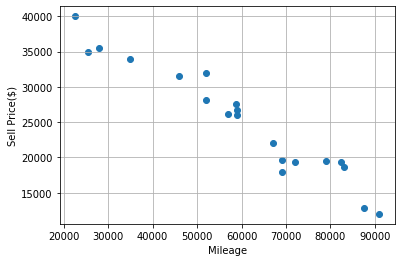

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.grid()
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")


**Car Age Vs Sell Price ($)**

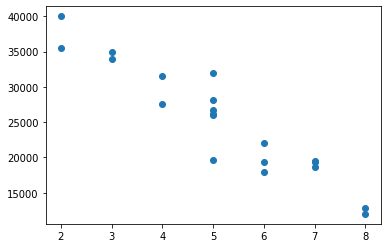

In [5]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])


<BarContainer object of 20 artists>

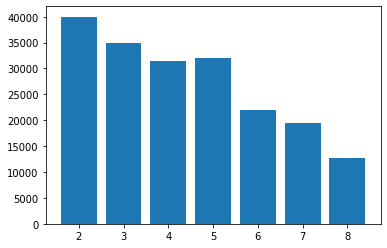

In [6]:
plt.bar(df['Age(yrs)'],df['Sell Price($)'])

In [7]:
# Running Correlation ,the correlation between the columns of the dataframe , using the pearson method.
corelation=df.corr
print(corelation(method='pearson'))

                Mileage  Age(yrs)  Sell Price($)
Mileage        1.000000  0.968290      -0.967173
Age(yrs)       0.968290  1.000000      -0.941522
Sell Price($) -0.967173 -0.941522       1.000000


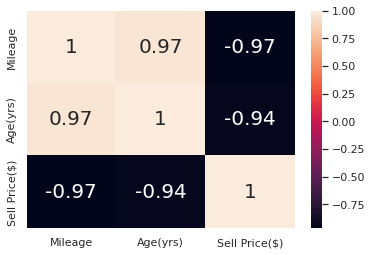

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
hm = df.corr()
g = sns.heatmap(hm, annot = True, annot_kws={'size':20})

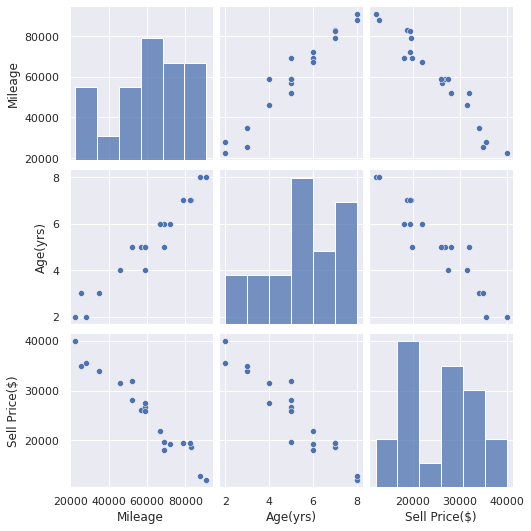

In [9]:
g = sns.pairplot(df)

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [10]:
X = df[['Mileage','Age(yrs)']]#independent input

In [11]:
y = df['Sell Price($)']# dependable variable ,output

In [12]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [13]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [14]:
from sklearn.model_selection import train_test_split #train test library for ML
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101) #we can addd after 0.3,random_state=101
# in this case test values will not be randomized,otherwise will ranomize after each run

In [15]:
X_train
#70%

,Mileage,Age(yrs)
14,82450,7
18,87600,8
0,69000,6
5,59000,5
12,59000,5
4,46000,4
8,91000,8
13,58780,4
9,67000,6
15,25400,3


In [16]:
X_test
#30%

,Mileage,Age(yrs)
3,22500,2
7,72000,6
2,57000,5
1,35000,3
10,83000,7
16,28000,2


In [17]:
y_train

14    19400
18    12800
0     18000
5     26750
12    26000
4     31500
8     12000
13    27500
9     22000
15    35000
19    28200
6     32000
17    19700
11    19500
Name: Sell Price($), dtype: int64

In [18]:
y_test

3     40000
7     19300
2     26100
1     34000
10    18700
16    35500
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [19]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
#The clf (for classifier) it is an estimator of the pridicted ,
#estimator instance is first fitted to the model; that is, it must learn from the model

LinearRegression()

In [20]:
X_test

,Mileage,Age(yrs)
3,22500,2
7,72000,6
2,57000,5
1,35000,3
10,83000,7
16,28000,2


In [21]:
t=clf.predict(X_test)
t

array([39479.39291505, 20737.81198471, 26279.15422301, 34753.23830124,
       16500.76994559, 37685.98014117])

In [22]:
y_test

3     40000
7     19300
2     26100
1     34000
10    18700
16    35500
Name: Sell Price($), dtype: int64

In [23]:
#score(X_train,Y_train) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with)
clf.score(X_test, y_test)

0.9683656768317045

**random_state argument**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8


Class exersice ,Can you fit a line on Car Mileage Vs Sell Price ($) grapf using the following example?

We can see from the poly1d function in numpy, that there is a line that can fit in the graph. the more degrees in the polynomial, the more accurate the line fits.

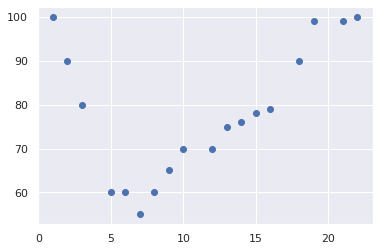

In [25]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

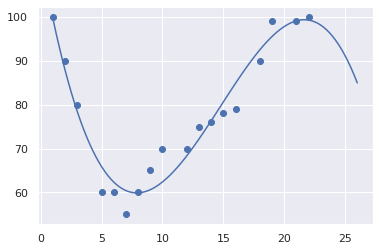

In [26]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y,3))# change value of 3 to 1 and 2 see what happens (one is strieaght line ,2 to the power of 2...polynomial)

myline = numpy.linspace(1, 26, 100) #change value of 22 to 25 17 see what happens

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

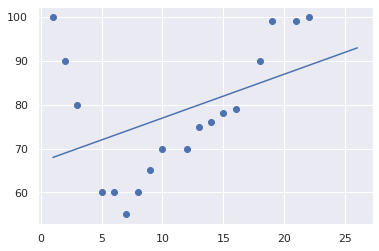

In [27]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y,1))# change value of 3 to 1 and 2 see what happens (one is strieaght line ,2 to the power of 2...polynomial)

myline = numpy.linspace(1, 26, 100) #change value of 22 to 25 17 see what happens

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

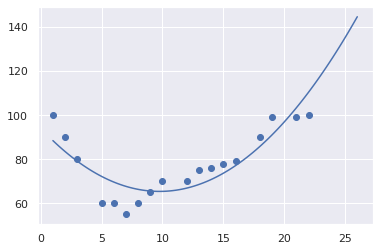

In [28]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y,2))# change value of 3 to 1 and 2 see what happens (one is strieaght line ,2 to the power of 2...polynomial)

myline = numpy.linspace(1, 26, 100) #change value of 22 to 25 17 see what happens

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

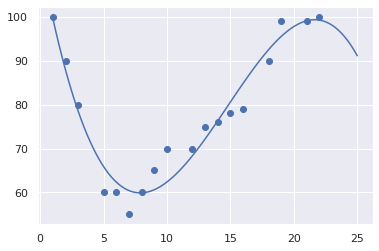

In [32]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y,3))# change value of 3 to 1 and 2 see what happens (one is strieaght line ,2 to the power of 2...polynomial)

myline = numpy.linspace(1, 25, 100) #change value of 22 to 25 17 see what happens -> incorporates a range of [1, 25], which means the fit line will start to trail downwards

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()